In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [18]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,roc_curve



In [11]:
import matplotlib.pyplot as plt


In [13]:
file = pd.read_csv("data_all.csv")
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4754 entries, 0 to 4753
Data columns (total 85 columns):
low_volume_percent                            4754 non-null float64
middle_volume_percent                         4754 non-null float64
take_amount_in_later_12_month_highest         4754 non-null int64
trans_amount_increase_rate_lately             4754 non-null float64
trans_activity_month                          4754 non-null float64
trans_activity_day                            4754 non-null float64
transd_mcc                                    4754 non-null float64
trans_days_interval_filter                    4754 non-null float64
trans_days_interval                           4754 non-null float64
regional_mobility                             4754 non-null float64
repayment_capability                          4754 non-null int64
is_high_user                                  4754 non-null int64
number_of_trans_from_2011                     4754 non-null float64
first_transacti

In [43]:
from sklearn.preprocessing import StandardScaler
features= [x for x in file.columns if x not in ['status']]
x = file[features]
y = file['status']
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.3,random_state = 2018)

# 归一化
scaler = StandardScaler()
scaler.fit(X_train)
X_train_standard = scaler.transform(X_train)
X_test_standard = scaler.transform(X_test)

In [53]:
def score(model,X_train,Y_train,X_test,Y_test):
    one_model = model.fit(X_train,Y_train)
    predictt = one_model.predict(X_test)
    
    if hasattr(model,'decision_function'):
        predictt_pro = one_model.decision_function(X_test)
    else:
        predictt_pro = one_model.predict_proba(X_test)[:,1]
    
    accuracy = accuracy_score(Y_test,predictt)
    precision = precision_score(Y_test,predictt)
    recall = recall_score(Y_test,predictt)
    F1_value = f1_score(Y_test,predictt)
    auc = roc_auc_score(Y_test,predictt_pro)
    
    print("准确率",accuracy)
    print("精准率",precision)
    print("召回率",recall)
    print("F1",F1_value)
    print("AUC",auc)
    
    test_fprs, test_tprs, test_thresholds = roc_curve(Y_test, predictt_pro) 
    plt.plot(test_fprs, test_tprs) 
    plt.title("ROCCurve") 
    plt.xlabel("FPR") 
    plt.ylabel("TPR") 
    plt.show()

    

准确率 0.7876664330763841
精准率 0.6609195402298851
召回率 0.3203342618384401
F1 0.4315196998123827
AUC 0.7657428562486308


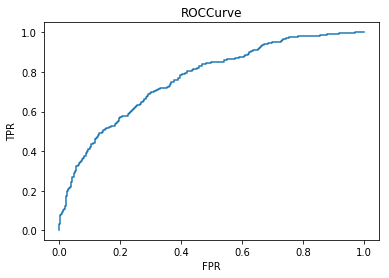

In [54]:
from sklearn.linear_model import LogisticRegression
lin = LogisticRegression(random_state =2018)
score(lin,X_train_standard,Y_train,X_test_standard,Y_test)

准确率 0.7813594954449895
精准率 0.6535947712418301
召回率 0.2785515320334262
F1 0.390625
AUC 0.7677954784931093


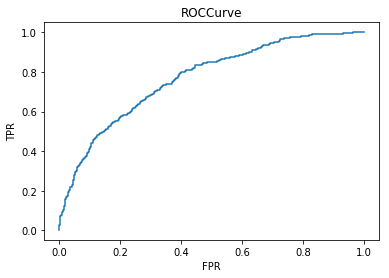

In [55]:
from sklearn.svm import LinearSVC
svc = LinearSVC(random_state=2018)
score(svc,X_train_standard,Y_train,X_test_standard,Y_test)

准确率 0.6853538892782061
精准率 0.38402061855670105
召回率 0.415041782729805
F1 0.3989290495314592
AUC 0.5956295055971123


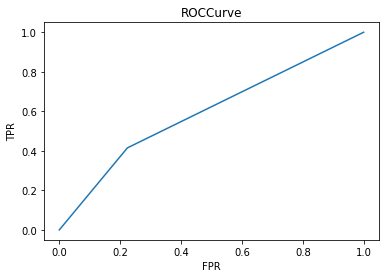

In [57]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state = 2018)
score(tree,X_train_standard,Y_train,X_test_standard,Y_test)

准确率 0.7687456201822004
精准率 0.5911949685534591
召回率 0.2618384401114206
F1 0.362934362934363
AUC 0.7199292145264102


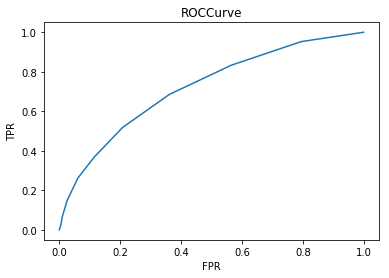

In [58]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 2018)
score(rf,X_train_standard,Y_train,X_test_standard,Y_test)

准确率 0.7806587245970568
精准率 0.6116504854368932
召回率 0.35097493036211697
F1 0.44601769911504424
AUC 0.7633146589047812


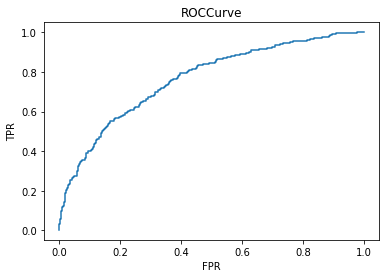

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
gr = GradientBoostingClassifier(random_state = 2018)
score(gr,X_train_standard,Y_train,X_test_standard,Y_test)

准确率 0.7701471618780659
精准率 0.5688888888888889
召回率 0.3565459610027855
F1 0.4383561643835616
AUC 0.7535210165566023


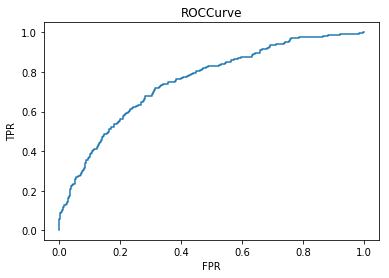

In [61]:
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier(random_state = 2018)
score(lgb_model,X_train_standard,Y_train,X_test_standard,Y_test)

准确率 0.7855641205325858
精准率 0.6305418719211823
召回率 0.3565459610027855
F1 0.4555160142348754
AUC 0.7713634419371329


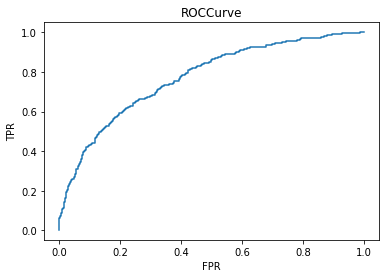

In [46]:
from xgboost.sklearn import XGBClassifier
xgbs = XGBClassifier(random_state=2018)
score(xgbs,X_train_standard,Y_train,X_test_standard,Y_test)